In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
workdir = "C:\\Users\\RNH\\Desktop\\Travail\\Projet9\\project\\train_reco"

# 1. Data preparation

In [3]:
click_folder = workdir + "\\clicks"
article_file = workdir + "\\articles_metadata.csv"
save_folder = workdir + "\\save"

%run $workdir/prepare_data.py \
--path_to_click_folder $click_folder \
--path_to_articles $article_file \
--path_to_save_folder $save_folder \
--test_size_ratio 0.1

####################
# DATA PREPARATION #
####################

-------------------
| Collecting data |
-------------------

Path to click folder: C:\Users\RNH\Desktop\Travail\Projet9\project\train_reco\clicks
Path to article file: C:\Users\RNH\Desktop\Travail\Projet9\project\train_reco\articles_metadata.csv
Number of unique users: 322897
Number of unique articles: 46033

------------------
| Filtering data |
------------------

Minimum number of user ratings to consider: 0
Minimum number of article ratings to consider: 0
Shape of the unfiltered dataframe: (2988181, 4)
Shape of the filtered dataframe: (2988181, 4)
Saving the data csv file to: C:\Users\RNH\Desktop\Travail\Projet9\project\train_reco\save

--------------------------------
| Splitting data in train/Test |
--------------------------------

Random state used to shuffle the data before applying the split: 140583
Proportion of the dataset in the test split: 0.1
Shape of the train set: (2689362, 4)
Shape of the test set: (29881

In [4]:
df_train = pd.read_csv("./save/df_train.csv", sep=",")
df_train.sample(n=10000).to_csv(os.path.join(workdir, "save", "df_train_small.csv"), index=False)

In [5]:
df_test = pd.read_csv("./save/df_test.csv", sep=",")
df_test.sample(n=1000).to_csv(os.path.join(workdir, "save", "df_test_small.csv"), index=False)

# 2. EDA

In [6]:
df_all = pd.read_csv("./save/df_all.csv", sep=",")

In [233]:
df_all

,user_id,article_id,session_size,click_timestamp
0,0,157541,2,1506826828020
1,20,157541,2,1506836548634
2,44,157541,5,1506857278141
3,45,157541,2,1506827309970
4,76,157541,2,1506828823469
...,...,...,...,...
2988176,195186,2221,4,1508210469562
2988177,75658,271117,4,1508210951703
2988178,217129,20204,2,1508210990810
2988179,217129,70196,2,1508211020810


In [230]:
df_all["session_size"].max()

124

In [229]:
df_all[df_all["session_size"] == df_all["session_size"].max()]

,user_id,article_id,session_size,click_timestamp
272634,73574,207255,124,1507586791311
386548,73574,207778,124,1507565732532
927404,73574,336223,124,1507567262438
948750,73574,42298,124,1507577979930
951213,73574,65374,124,1507573989194
...,...,...,...,...
2582268,73574,107194,124,1507594898900
2582294,73574,107207,124,1507595155260
2582323,73574,107083,124,1507595285962
2582364,73574,107298,124,1507596202425


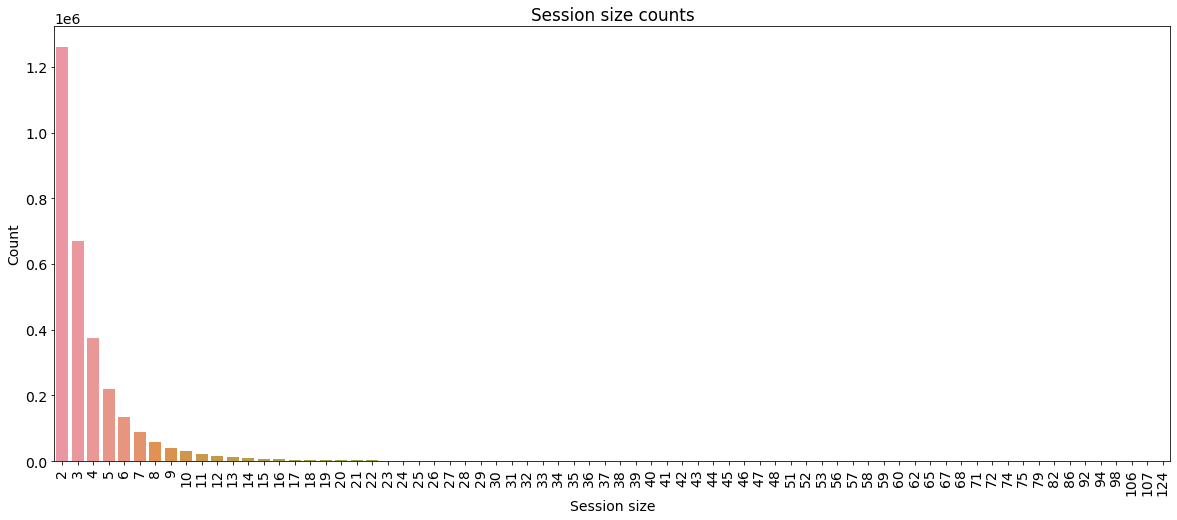

In [231]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.rcParams.update({"font.size": 14})
#data = pd.DataFrame(df_all["session_size"].value_counts().sort_index(ascending=True))
s = sns.barplot(ax=ax, x=df_all["session_size"].value_counts().sort_index(ascending=True).index,
                y=df_all["session_size"].value_counts().sort_index(ascending=True).values)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
ax.set_xlabel("Session size")
ax.set_ylabel("Count")
plt.title("Session size counts")
#for p in s.patches:
#    s.annotate("%.2f" % p.get_height(), 
#               (p.get_x() + p.get_width() / 2., p.get_height()),
#               ha="center", va="center", 
#               fontsize=14, color="black", xytext=(0, 10),
#               textcoords="offset points")
plt.show()

In [227]:
df_all.groupby("article_id")["session_size"].count().sort_values(ascending=False)#.clip(upper=9999)

article_id
160974    37213
272143    28943
336221    23851
234698    23499
123909    23122
          ...  
120347        1
120361        1
120365        1
120371        1
3             1
Name: session_size, Length: 46033, dtype: int64

# 3. Evaluation of recommendation models

## 3.1 Weighted mean rating

In [31]:
df_train_path = workdir + "\\save\\df_train_small.csv"
df_test_path = workdir + "\\save\\df_test_small.csv"
min_ratings = 5
save_folder = workdir + "\\save"

%run $workdir/reco_wmr.py \
--path_to_df_train $df_train_path \
--path_to_df_test $df_test_path \
--min_ratings $min_ratings \
--path_to_save_folder $save_folder

  0%|          | 0/2512 [00:00<?, ?it/s]

#######################################
# TRAINING STEP: WEIGHTED MEAN RATING #
#######################################

----------------------------------
| Getting rating counts and mean |
----------------------------------

Path to df_train csv file: C:\Users\RNH\Desktop\Travail\Projet9\project\train_reco\save\df_train_small.csv


100%|██████████| 2512/2512 [27:02<00:00,  1.55it/s]



-----------------------------------
| Computing weighted mean ratings |
-----------------------------------

Weighted mean m parameter: 5
Path to the saved df_reco_wmr csv file: C:\Users\RNH\Desktop\Travail\Projet9\project\train_reco\save\df_reco_wmr.csv

------------------
| Computing RMSE |
------------------

Path to df_test csv file: C:\Users\RNH\Desktop\Travail\Projet9\project\train_reco\save\df_test_small.csv
RMSE: 2.86

------------
Total recommendation step time: 27m 3s


<Figure size 432x288 with 0 Axes>

In [32]:
df_reco_wmr = pd.read_csv("./save/df_reco_wmr_pred.csv", sep=",", index_col=0)
df_reco_wmr

,session_size,session_size_pred
article_id,,
4907,3,5.126165
5408,6,3.987017
5408,2,3.987017
14827,7,4.313859
16087,2,4.411879
...,...,...
357554,2,4.313859
357554,7,4.313859
358109,5,4.235394


## 3.2 Item-Item similarity

In [33]:
df_path = workdir + "\\save\\df_all.csv"
df_test_path = workdir + "\\save\\df_test_small.csv"
path_to_embeddings = workdir + "\\articles_embeddings.pickle"
n_random_users = 10
save_folder = workdir + "\\save"

%run $workdir/reco_iis.py \
--path_to_df $df_path \
--path_to_embeddings $path_to_embeddings \
--n_random_users $n_random_users \
--path_to_save_folder $save_folder

#######################################
# TRAINING STEP: ITEM-ITEM SIMILARITY #
#######################################

----------------------
| Reading embeddings |
----------------------

Path to embeddings pickle file: C:\Users\RNH\Desktop\Travail\Projet9\project\train_reco\articles_embeddings.pickle

----------------------------
| Computing Top N accuracy |
----------------------------

Path to dataframe csv file: C:\Users\RNH\Desktop\Travail\Projet9\project\train_reco\save\df_all.csv
Number of random users considered: 10



  0%|          | 327/364047 [00:00<01:52, 3237.89it/s]

Computing cosine similarity for user 160497 first read article
First read article ID: 111210
Next read article ID: 284452
All next articles: [284452]


  0%|          | 361/364047 [00:00<01:40, 3609.99it/s]

Number of articles with similarity > 0.5: 17773
Top 1 Reco: [279648]
Top 2 Reco: [279648 281163]
Top 3 Reco: [279648 281163 277776]
Top 4 Reco: [279648 281163 277776 281531]
Top 5 Reco: [279648 281163 277776 281531 278164]

Computing cosine similarity for user 109386 first read article
First read article ID: 64329
Next read article ID: 156447
All next articles: [156447 293301 313602 159762 156654 285524 285343 124749 124350 123756
 129434 129434  87224 336223 119193 183176 336245]


  0%|          | 339/364047 [00:00<01:47, 3388.71it/s]

Number of articles with similarity > 0.5: 24551
Top 1 Reco: [356361]
Top 2 Reco: [356361 156690]
Top 3 Reco: [356361 156690 211944]
Top 4 Reco: [356361 156690 211944 160132]
Top 5 Reco: [356361 156690 211944 160132 357812]

Computing cosine similarity for user 225045 first read article
First read article ID: 140528
Next read article ID: 338339
All next articles: [338339 124749 293114 284985 360601  96523 273450  96210  32088  20691]


  0%|          | 319/364047 [00:00<01:54, 3189.96it/s]

Number of articles with similarity > 0.5: 10088
Top 1 Reco: [123609]
Top 2 Reco: [123609 141026]
Top 3 Reco: [123609 141026 140676]
Top 4 Reco: [123609 141026 140676 124717]
Top 5 Reco: [123609 141026 140676 124717 140678]

Computing cosine similarity for user 139191 first read article
First read article ID: 313431
Next read article ID: 70646
All next articles: [ 70646 206785  63304]


  0%|          | 338/364047 [00:00<01:48, 3346.65it/s]

Number of articles with similarity > 0.5: 30184
Top 1 Reco: [313006]
Top 2 Reco: [313006 313868]
Top 3 Reco: [313006 313868 313530]
Top 4 Reco: [313006 313868 313530 310074]
Top 5 Reco: [313006 313868 313530 310074 313601]

Computing cosine similarity for user 105215 first read article
First read article ID: 156447
Next read article ID: 158082
All next articles: [158082 338350  64329 354086 336220]


  0%|          | 384/364047 [00:00<01:34, 3838.10it/s]

Number of articles with similarity > 0.5: 25457
Top 1 Reco: [158229]
Top 2 Reco: [158229 161334]
Top 3 Reco: [158229 161334 159674]
Top 4 Reco: [158229 161334 159674 159762]
Top 5 Reco: [158229 161334 159674 159762 156624]

Computing cosine similarity for user 124268 first read article
First read article ID: 156624
Next read article ID: 158082
All next articles: [158082 162765]


  0%|          | 306/364047 [00:00<01:58, 3059.00it/s]

Number of articles with similarity > 0.5: 18886
Top 1 Reco: [158536]
Top 2 Reco: [158536 156447]
Top 3 Reco: [158536 156447 160918]
Top 4 Reco: [158536 156447 160918 159762]
Top 5 Reco: [158536 156447 160918 159762 157192]

Computing cosine similarity for user 27730 first read article
First read article ID: 207391
Next read article ID: 118948
All next articles: [118948  96663 202557 160974 156560 336476 288321 289186 331116 215613
 202355 218028]


  0%|          | 351/364047 [00:00<01:43, 3508.55it/s]

Number of articles with similarity > 0.5: 20167
Top 1 Reco: [206845]
Top 2 Reco: [206845 207310]
Top 3 Reco: [206845 207310 206639]
Top 4 Reco: [206845 207310 206639 206197]
Top 5 Reco: [206845 207310 206639 206197 207834]

Computing cosine similarity for user 147489 first read article
First read article ID: 206462
Next read article ID: 284312
All next articles: [284312 313431 199197 123757 123818 123909 276970]


  0%|          | 348/364047 [00:00<01:44, 3478.59it/s]

Number of articles with similarity > 0.5: 15909
Top 1 Reco: [207711]
Top 2 Reco: [207711 284459]
Top 3 Reco: [207711 284459  64065]
Top 4 Reco: [207711 284459  64065 208524]
Top 5 Reco: [207711 284459  64065 208524 346227]

Computing cosine similarity for user 239068 first read article
First read article ID: 87224
Next read article ID: 107212
All next articles: [107212]


  0%|          | 350/364047 [00:00<01:43, 3498.59it/s]

Number of articles with similarity > 0.5: 21992
Top 1 Reco: [284638]
Top 2 Reco: [284638  86733]
Top 3 Reco: [284638  86733  86384]
Top 4 Reco: [284638  86733  86384 105558]
Top 5 Reco: [284638  86733  86384 105558  98309]

Computing cosine similarity for user 271841 first read article
First read article ID: 289090
Next read article ID: 235616
All next articles: [235616 336220]


100%|██████████| 364047/364047 [01:44<00:00, 3473.58it/s]


Number of articles with similarity > 0.5: 11099
Top 1 Reco: [288321]
Top 2 Reco: [288321 344406]
Top 3 Reco: [288321 344406 288500]
Top 4 Reco: [288321 344406 288500 289186]
Top 5 Reco: [288321 344406 288500 289186 288457]

Top 1 accuracy on 10 random users: 0.0
Top 2 accuracy on 10 random users: 0.0
Top 3 accuracy on 10 random users: 0.0
Top 4 accuracy on 10 random users: 0.0
Top 5 accuracy on 10 random users: 0.0
Next in Reco accuracy on 10 random users: 0.6
Any Reco in Next accuracy on 10 random users: 0.7

------------
Total recommendation step time: 19m 7s


## 3.3 Collaborative filtering

<b> Top 15 users and articles (most clicks) </b>

In [34]:
users_grouped = df_all.groupby("user_id")["session_size"].count()
top_users = users_grouped.sort_values(ascending=False)[:15]
top_users

user_id
5890     1232
73574     939
15867     900
80350     783
15275     746
2151      722
4568      529
12897     513
11521     502
34541     501
16695     480
6922      469
4966      465
851       452
48723     451
Name: session_size, dtype: int64

In [35]:
articles_grouped = df_all.groupby("article_id")["session_size"].count()
top_articles = articles_grouped.sort_values(ascending=False)[:15]
top_articles

article_id
160974    37213
272143    28943
336221    23851
234698    23499
123909    23122
336223    21855
96210     21577
162655    21062
183176    20303
168623    19526
331116    18788
158536    18646
64329     18618
199198    17221
272660    16175
Name: session_size, dtype: int64

In [36]:
top_r = df_all.join(top_users, rsuffix="_r", how="inner", on="user_id")
top_r = top_r.join(top_articles, rsuffix="_r", how="inner", on="article_id")
top_r

,user_id,article_id,session_size,click_timestamp,session_size_r,session_size_r
51359,4966,272660,9,1506903393355,465,16175
47131,2151,272660,4,1506896941346,722,16175
47012,6922,272660,3,1506897252077,469,16175
58401,12897,272660,7,1506943095529,513,16175
48978,4568,272660,6,1506899255838,529,16175
...,...,...,...,...,...,...
306086,2151,158536,4,1506978750869,722,18646
298492,851,158536,8,1506944419408,452,18646
314061,34541,158536,13,1506995681872,501,18646
303058,16695,158536,7,1506959097873,480,18646


In [37]:
top_r = df_all.join(top_users, rsuffix="_r", how="inner", on="user_id")
top_r = top_r.join(top_articles, rsuffix="_r", how="inner", on="article_id")
pd.crosstab(top_r["user_id"], top_r["article_id"], top_r["session_size"], aggfunc=np.sum)

article_id,64329,96210,123909,158536,160974,162655,168623,183176,199198,234698,272143,272660,331116,336221,336223
user_id,,,,,,,,,,,,,,,
851,8.0,5.0,5.0,8.0,17.0,9.0,17.0,8.0,9.0,12.0,11.0,NaN,16.0,NaN,4.0
2151,5.0,41.0,17.0,36.0,68.0,31.0,8.0,20.0,65.0,131.0,37.0,4.0,10.0,91.0,119.0
4568,NaN,16.0,13.0,NaN,2.0,30.0,14.0,9.0,NaN,15.0,30.0,6.0,7.0,NaN,18.0
4966,10.0,12.0,12.0,NaN,7.0,15.0,9.0,7.0,5.0,5.0,6.0,9.0,8.0,21.0,6.0
5890,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,3.0,NaN,NaN
6922,4.0,5.0,4.0,NaN,30.0,NaN,NaN,2.0,3.0,55.0,30.0,3.0,11.0,37.0,32.0
11521,NaN,NaN,33.0,NaN,10.0,7.0,NaN,NaN,17.0,NaN,17.0,NaN,33.0,25.0,25.0
12897,NaN,28.0,22.0,NaN,17.0,30.0,27.0,28.0,4.0,35.0,3.0,7.0,7.0,22.0,50.0
15867,2.0,2.0,46.0,NaN,35.0,10.0,7.0,2.0,NaN,12.0,NaN,3.0,NaN,3.0,NaN


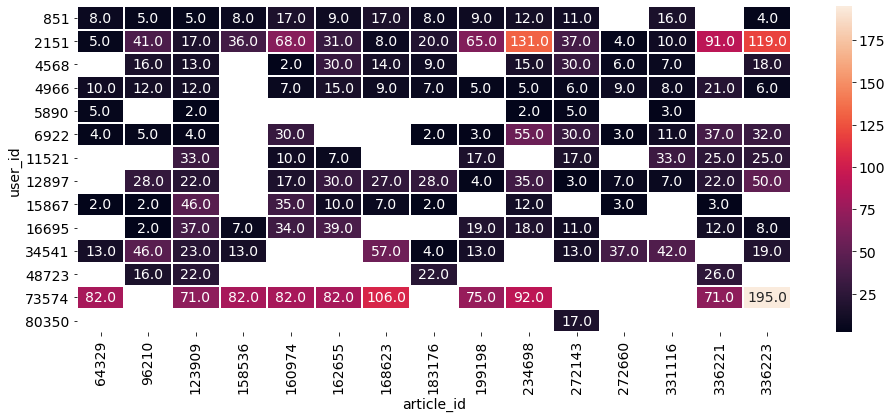

In [38]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.rcParams.update({"font.size": 14})
sns.heatmap(data=pd.crosstab(top_r["user_id"], top_r["article_id"], top_r["session_size"], aggfunc=np.sum),
            annot=True, fmt=".1f",
            #cmap=["red", "orange", "yellow", "green"], cbar=False, 
            linewidth=1, linecolor="white")
plt.show()

<b> Local training of Keras model </b>

##########################################
# TRAINING STEP: COLLABORATIVE FILTERING #
##########################################

----------------------------------
| Label encoding users and items |
----------------------------------

Path to df_train csv file: C:\Users\RNH\Desktop\Travail\Projet9\project\train_reco\save\df_train.csv
Number of unique users: 321818
Number of unique articles: 43562

------------------------
| Training Keras model |
------------------------

Learning rate: 0.001
Optimizer: Adam
Loss: mean_squared_error
batch size: 512
Epochs: 3
Best fitted model saved to: C:\Users\RNH\Desktop\Travail\Projet9\project\train_reco\save\best_model.h5

Epoch 1/3
4728/4728 [==============================] - 884s 187ms/step - loss: 8.7318 - val_loss: 5.4127

Epoch 00001: val_loss improved from inf to 5.41273, saving model to C:\Users\RNH\Desktop\Travail\Projet9\project\train_reco\save\best_model.h5
Epoch 2/3
4728/4728 [==============================] - 876s 185ms/step - loss: 5.

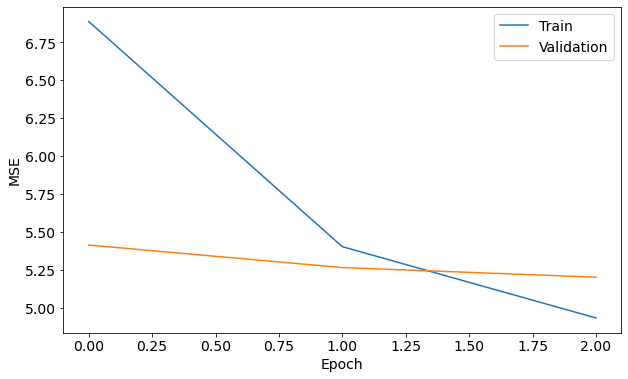

In [140]:
df_train_path = workdir + "\\save\\df_train.csv"
n_factors = 50
batch_size = 512
learning_rate = 0.001
num_epochs = 3
save_folder = workdir + "\\save"

%run $workdir/reco_cf.py \
--path_to_df_train $df_train_path \
--n_factors $n_factors \
--learning_rate $learning_rate \
--batch_size $batch_size \
--num_epochs $num_epochs \
--path_to_save_folder $save_folder

# 4. Recommendation module

In [160]:
model = "iis"
user_id = 100289
num_reco = 5

path_to_df_wmr = workdir + "\\save\\df_reco_wmr.csv"
min_ratings = 5

path_to_df_iis = workdir + "\\save\\df_all.csv"
path_to_embeddings = workdir + "\\articles_embeddings.pickle"

path_to_df_cf = workdir + "\\save\\df_cf_nn.csv"
path_to_nn_model = workdir + "\\save\\best_model.h5"


%run $workdir/predict.py \
--model $model \
--user_id $user_id \
--num_reco $num_reco \
--path_to_df_wmr $path_to_df_wmr \
--min_ratings $min_ratings \
--path_to_df_iis $df_path \
--path_to_embeddings $path_to_embeddings \
--path_to_df_cf $path_to_df_cf \
--path_to_nn_model $path_to_nn_model

#########################
# RECOMMENDATION MODULE #
#########################

Recommendation for user ID: 100289
Recommendation model used: Item-Item similarity

Computing cosine similarity for user 100289 first opened article


100%|██████████| 364047/364047 [01:44<00:00, 3479.10it/s]



Top 5 articles recommended: [203558 202443 202330 203536 202346]

------------
Total time: 1m 52s


In [148]:
model = "cf"
user_id = 100289
num_reco = 5

path_to_df_wmr = workdir + "\\save\\df_reco_wmr.csv"
min_ratings = 5

path_to_df_iis = workdir + "\\save\\df_all.csv"
path_to_embeddings = workdir + "\\articles_embeddings.pickle"

path_to_df_cf = workdir + "\\save\\df_cf_nn.csv"
path_to_nn_model = workdir + "\\save\\best_model.h5"


%run $workdir/predict.py \
--model $model \
--user_id $user_id \
--num_reco $num_reco \
--path_to_df_wmr $path_to_df_wmr \
--min_ratings $min_ratings \
--path_to_df_iis $df_path \
--path_to_embeddings $path_to_embeddings \
--path_to_df_cf $path_to_df_cf \
--path_to_nn_model $path_to_nn_model

#########################
# RECOMMENDATION MODULE #
#########################

Recommendation for user ID: 100289
Recommendation model used: Collaborative filtering with Keras
User ID encoded 100126
[31947 12686 15253 25764 11981]

Top 5 articles recommended: [257577, 95913, 110263, 204710, 89137]

------------
Total time: 0m 2s
